In [1]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !git clone https://github.com/facebookresearch/fastText.git

In [ ]:
# !cd fastText && sudo pip install .

In [10]:
# import fasttext.util
# fasttext.util.download_model('en', if_exists='ignore')  # English
!pip install fasttext
# # pip uninstall fasttext


# !pip install fasttext==0.6.0

In [11]:
import fasttext

# Load the fastText model
fasttext_model = fasttext.load_model("/content/drive/MyDrive/cc.en.300.bin")


In [12]:
import json
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

def loadFasttextData(filePath):
    with open(filePath, "r") as f:
        data = json.load(f)
    texts = [data[str(id)]["text"] for id in range(1, len(data)+1)]
    labels = [data[str(id)]["labels"] for id in range(1, len(data)+1)]
    return texts, labels

def loadFasttextModel(word2vecFile):
    print("Loading Fasttext Model")
    model = fasttext_model
    print("Done.")
    return model

def applyEmbedding(texts, fasttext_model):
    finList = []
    for text in texts:
        tempList = []
        for word in text.split():
            if word in fasttext_model:
                tempList.append(fasttext_model[word])
            else:
                tempList.append(np.random.rand(fasttext_model.get_dimension()))
        finList.append(tempList)
    return finList

# trainTexts, trainLabels = loadData("/content/train_processed_t2.json")
# validationTexts, validationLabels = loadData("/content/validation_processed_t2.json")
# testTexts, testLabels = loadData("/content/test_processed_t2.json")



trainTexts, trainLabels = loadFasttextData("/content/drive/MyDrive/NLP_ass2/train_processed_t2.json")
validationTexts, validationLabels = loadFasttextData("/content/drive/MyDrive/NLP_ass2/validation_processed_t2.json")
testTexts, testLabels = loadFasttextData("/content/drive/MyDrive/NLP_ass2/test_processed_t2.json")

fasttext_model = loadFasttextModel("/content/drive/MyDrive/cc.en.300.bin")

embedded_trainTexts = applyEmbedding(trainTexts, fasttext_model)
embedded_validationTexts = applyEmbedding(validationTexts, fasttext_model)
embedded_testTexts = applyEmbedding(testTexts, fasttext_model)


Loading Fasttext Model
Done.


In [13]:
class CustomDataset(Dataset):
    def __init__(self, embedded_data, labels):
        self.embedded_data = embedded_data
        self.labels = labels
        self.max_length=469

    def __len__(self):
        return len(self.embedded_data)

    def __getitem__(self, idx):
        embedded_sequence = self.embedded_data[idx]
        labels = self.labels[idx]

        # Pad sequences to the maximum length in the batch

        # print(max_length)
        lent=len(labels)
        padded_sequence = []
        padded_labels=[]
        if(lent<=max_length):
          padded_sequence = embedded_sequence + [[0] * 300 for _ in range(self.max_length - lent)]
          padded_labels=labels+[-100]*(self.max_length - lent)


        # padded_sequence = []
        # for seq in embedded_sequence:
        #     if len(seq) < max_length:
        #         padded_sequence.append(seq + [0] * (max_length - len(seq)))

        #     else:
        #         padded_sequence.append(seq)
        #         print(seq.shape)

        return torch.tensor(padded_sequence).float(), torch.tensor(padded_labels).float()

max_length=469


trainDataset = CustomDataset(embedded_trainTexts, trainLabels)
validationDataset = CustomDataset(embedded_validationTexts, validationLabels)
testDataset = CustomDataset(embedded_testTexts, testLabels)
print(trainDataset)
trainLoader = DataLoader(trainDataset, batch_size=32, shuffle=True)
validationLoader = DataLoader(validationDataset, batch_size=32, shuffle=False)
testLoader = DataLoader(testDataset, batch_size=32, shuffle=False)

In [14]:
for sent in range(len(trainLabels)):
  for label in range(len(trainLabels[sent])):
    if trainLabels[sent][label]=="B":
      trainLabels[sent][label] = 0
    elif trainLabels[sent][label]=="I":
      trainLabels[sent][label] = 1
    elif trainLabels[sent][label]=="O":
      trainLabels[sent][label] = 2

for sent in range(len(validationLabels)):
  for label in range(len(validationLabels[sent])):
    if validationLabels[sent][label]=="B":
      validationLabels[sent][label] = 0
    elif validationLabels[sent][label]=="I":
      validationLabels[sent][label] = 1
    elif validationLabels[sent][label]=="O":
      validationLabels[sent][label] = 2

for sent in range(len(testLabels)):
  for label in range(len(testLabels[sent])):
    if testLabels[sent][label]=="B":
      testLabels[sent][label] = 0
    elif testLabels[sent][label]=="I":
      testLabels[sent][label] = 1
    elif testLabels[sent][label]=="O":
      testLabels[sent][label] = 2


embedded_trainTensor = []
for senVect in embedded_trainTexts:
  embedded_trainTensor.append(torch.tensor(senVect))
embedded_validationTensor = []
for senVect in embedded_validationTexts:
  embedded_validationTensor.append(torch.tensor(senVect))
embedded_testTensor = []
for senVect in embedded_testTexts:
  embedded_testTensor.append(torch.tensor(senVect))
label_trainTensor = []
for label in trainLabels:
  print(label)
  break
for label in trainLabels:
  label_trainTensor.append(torch.tensor(label))
label_validationTensor = []
for label in validationLabels:
  label_validationTensor.append(torch.tensor(label))
label_testTensor = []
for label in testLabels:
  label_testTensor.append(torch.tensor(label))

<ipython-input-14-9a7827821b32>:31: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  embedded_trainTensor.append(torch.tensor(senVect))


[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2]


In [15]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import DataLoader
# from sklearn.metrics import f1_score, accuracy_score

# class VanillaGRU(nn.Module):
#     def __init__(self, input_dim, hidden_dim, output_dim):
#         super(VanillaGRU, self).__init__()
#         self.hidden_dim = hidden_dim
#         self.gru = nn.GRU(input_dim, hidden_dim, batch_first=True)
#         self.fc = nn.Linear(hidden_dim, output_dim)

#     def forward(self, x):
#         out, _ = self.gru(x)
#         # out = self.fc(out[:, -1, :])
#         out = self.fc(out)
#         return out


#     def custom_loss(self, predicted_probs, target_labels):
#         """
#         Custom loss function that computes the cross-entropy loss
#         given predicted probabilities and target labels.
#         """
#         # Convert target labels to one-hot encoding
#         losses=0
#         # new_labels=[]
#         # prob_label=[]
#         for k in range(len(target_labels.tolist())):
#           i=target_labels[k]
#           j=predicted_probs[k]
#           a=i.tolist().index(-100)
#           # print(a)
#           b=torch.tensor(i.tolist()[:a],dtype=torch.long)
#           # print(b)
#           d=torch.tensor(j.tolist()[:a])
#           # print(b)
#           # print(d)

#           loss = F.cross_entropy(d, b)
#           losses+=loss


#         # for i,j in (target_labels,predicted_probs):
#         #   a=i.tolist().index(-100)
#         #   # print(a)
#         #   b=i.tolist()[:a]
#         #   # print(b)
#         #   d=j.tolist()[:a,]
#         #   loss = F.cross_entropy(d, b)
#         #   losses+=loss
#           # new_labels.append(b)


#         # target_one_hot = torch.nn.functional.one_hot(target_labels.to(torch.int64), num_classes=self.fc.out_features)
#         # # target_one_hot = F.one_hot(target_labels, num_classes=self.fc.out_features)

#         # # Compute cross-entropy loss
#         # # target_one_hot = torch.nn.functional.one_hot(target_labels.to(torch.int64), num_classes=self.fc.out_features)

#         # loss = F.binary_cross_entropy_with_logits(predicted_probs, target_one_hot.float())
#         return losses



# def macro_f1_score(predictions, labels):
#     predictions = predictions.argmax(dim=1).cpu().numpy()
#     labels = labels.cpu().numpy()
#     return f1_score(labels, predictions, average='macro')

# def train_model(model, train_loader, validation_loader, criterion, optimizer, num_epochs):
#     train_loss = []
#     val_loss = []
#     train_f1_score = []
#     val_f1_score = []
#     va=0
#     for epoch in range(num_epochs):
#         print(epoch)
#         model.train()
#         cur_train_loss = 0.0
#         cur_train_predictions = []
#         cur_train_labels = []

#         for seq, label in train_loader:
#             optimizer.zero_grad()
#             outputs = model(seq)

#             # print(va)
#             # va=va+1
#             # print(outputs.size())
#             # print(label.size())
#             loss = model.custom_loss(outputs, label)
#             loss.requires_grad = True
#             loss.backward()
#             optimizer.step()
#             cur_train_loss += loss.item()

#             cur_train_predictions.extend(outputs.argmax(dim=1).cpu().numpy())
#             cur_train_labels.extend(label.argmax(dim=1).cpu().numpy())

#         train_loss.append(cur_train_loss / len(train_loader))
#         train_f1_score.append(macro_f1_score(torch.tensor(cur_train_predictions), torch.tensor(cur_train_labels)))
#         model.eval()

#         cur_val_loss = 0.0
#         cur_val_predictions = []
#         cur_val_labels = []

#         with torch.no_grad():
#             for seq, label in validation_loader:
#                 outputs = model(seq)
#                 # print(outputs.size())
#                 # print(label.size())
#                 loss = model.custom_loss(outputs, label)
#                 cur_val_loss += loss.item()
#                 cur_val_predictions.extend(outputs.argmax(dim=1).cpu().numpy())
#                 cur_val_labels.extend(label.argmax(dim=1).cpu().numpy())

#         val_loss.append(cur_val_loss / len(validation_loader))
#         val_f1_score.append(macro_f1_score(torch.tensor(cur_val_predictions), torch.tensor(cur_val_labels)))

#     return train_loss, train_f1_score, val_loss, val_f1_score




# input_dim = 300  # Based on size of Word2Vec embedding
# hidden_dim = 128  # Randomly chosen
# output_dim = 3  # No of labels
# num_epochs = 200
# learning_rate = 0.01

# model = VanillaGRU(input_dim, hidden_dim, output_dim)
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# final_train_loss, final_train_f1_score, final_val_loss, final_val_f1_score = train_model(model, trainLoader, validationLoader, criterion, optimizer, num_epochs)

In [16]:
torch.set_grad_enabled(True)

In [17]:
def evaluate_model(model, test_loader):
    model.eval()
    final_predictions = []
    final_labels = []

    with torch.no_grad():
        for seq, label in test_loader:

          outputs = model(seq)
          for k in range(len(label.tolist())):
            i=label[k]
            j=outputs[k]
            a=i.tolist().index(-100)
            # print(a)
            b=i.tolist()[:a]
            # print(b)
            d=torch.tensor(j.tolist()[:a])
            predicted_labels = (torch.argmax(d, dim=1)).tolist()
            # print(predicted_labels)
            # print(b)
            final_predictions=final_predictions+predicted_labels
            final_labels=final_labels+b
            # print(b)
            # print(d)


    print(final_predictions)
    print(final_labels)

    accuracy = accuracy_score(final_labels, final_predictions)
    macro_f1 = f1_score(final_labels, final_predictions, average='macro')
    print(accuracy,macro_f1)
    return accuracy, macro_f1



In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.metrics import f1_score, accuracy_score

class VanillaGRU(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(VanillaGRU, self).__init__()
        self.hidden_dim = hidden_dim
        self.gru = nn.GRU(input_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out, _ = self.gru(x)
        # out = self.fc(out[:, -1, :])
        out = self.fc(out)
        return out

    def custom_loss(self, predicted_probs, target_labels):
        """
        Custom loss function that computes the cross-entropy loss
        given predicted probabilities and target labels.
        """
        # Apply masking to handle variable-length sequences with padding
        mask = (target_labels != -100).float()

        # Compute cross-entropy loss
        loss = F.cross_entropy(predicted_probs.permute(0, 2, 1), target_labels.to(torch.long), reduction='none')
        # Apply masking to ignore padded elements
        masked_loss = (loss * mask).sum(dim=1).mean()

        return masked_loss

    # def custom_loss(self, predicted_probs, target_labels):
    #     """
    #     Custom loss function that computes the cross-entropy loss
    #     given predicted probabilities and target labels.
    #     """
    #     # Convert target labels to one-hot encoding
    #     losses=0
    #     # new_labels=[]
    #     # prob_label=[]
    #     for k in range(len(target_labels.tolist())):
    #       i=target_labels[k]
    #       j=predicted_probs[k]
    #       a=i.tolist().index(-100)
    #       # print(a)
    #       b=torch.tensor(i.tolist()[:a],dtype=torch.long)
    #       # print(b)
    #       d=torch.tensor(j.tolist()[:a])
    #       # print(b)
    #       # print(d)

    #       loss = F.cross_entropy(d, b)
    #       losses+=loss



    #     return losses



def macro_f1_score(predictions, labels):
    predictions = predictions.argmax(dim=1).cpu().numpy()
    labels = labels.cpu().numpy()
    return f1_score(labels, predictions, average='macro')

def train_model(model, train_loader, validation_loader, criterion, optimizer, num_epochs):
    train_loss = []
    val_loss = []
    train_f1_score = []
    val_f1_score = []
    va=0
    model.train()
    for epoch in range(num_epochs):
        print(epoch)

        cur_train_loss = 0.0
        cur_train_predictions = []
        cur_train_labels = []

        for seq, label in train_loader:
            optimizer.zero_grad()
            outputs = model(seq)

            # print(va)
            # va=va+1
            # print(outputs.size())
            # print(label.size())
            loss = model.custom_loss(outputs, label)
            # loss.requires_grad = True
            loss.backward()
            optimizer.step()
            cur_train_loss += loss.item()

            cur_train_predictions.extend(outputs.argmax(dim=1).cpu().numpy())
            cur_train_labels.extend(label.argmax(dim=1).cpu().numpy())

        train_loss.append(cur_train_loss / len(train_loader))
        acc,f1=evaluate_model(model,train_loader)
        train_f1_score.append(f1)

        model.eval()
        print(cur_train_loss)
        cur_val_loss = 0.0
        cur_val_predictions = []
        cur_val_labels = []

        with torch.no_grad():
            for seq, label in validation_loader:
                outputs = model(seq)
                # print(outputs.size())
                # print(label.size())
                loss = model.custom_loss(outputs, label)
                cur_val_loss += loss.item()
                cur_val_predictions.extend(outputs.argmax(dim=1).cpu().numpy())
                cur_val_labels.extend(label.argmax(dim=1).cpu().numpy())

        val_loss.append(cur_val_loss / len(validation_loader))
        acc,f1=evaluate_model(model,validation_loader)
        val_f1_score.append(f1)

    return train_loss, train_f1_score, val_loss, val_f1_score




input_dim = 300  # Based on size of GloVe embedding
hidden_dim = 128  # Randomly chosen
output_dim = 3  # No of labels
num_epochs = 20
learning_rate = 0.01

model = VanillaGRU(input_dim, hidden_dim, output_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

final_train_loss, final_train_f1_score, final_val_loss, final_val_f1_score = train_model(model, trainLoader, validationLoader, criterion, optimizer, num_epochs)

0
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

In [ ]:
import matplotlib.pyplot as plt

def plotloss(losses,name):
  epochs = range(1, len(losses) + 1)

  plt.plot(epochs, losses, marker='o', color='m', linestyle='-')


  plt.xlabel('Epoch Number')
  plt.ylabel(f'{name} Loss')
  plt.title(f'{name} Loss vs. Epoch Number')


  plt.grid(True)
  plt.tight_layout()
  plt.show()

In [ ]:
def plot_f1(f1,name):
  epochs = range(1, len(f1) + 1)

  plt.plot(epochs, f1, marker='o', color='m', linestyle='-')


  plt.xlabel('Epoch Number')
  plt.ylabel(f'{name} F1')
  plt.title(f'{name} F1 vs. Epoch Number')


  plt.grid(True)
  plt.tight_layout()
  plt.show()

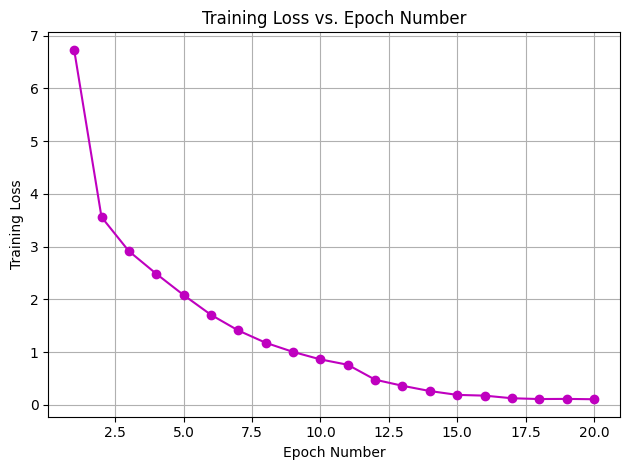

In [ ]:
plotloss(final_train_loss,"Training")

In [ ]:
print("Train f1 score",final_train_f1_score)

Train f1 score [0.6732674652176373, 0.7658035180315933, 0.8288508927803412, 0.864654258512493, 0.8957158662729507, 0.922753191301758, 0.9455243752099016, 0.9580760242605599, 0.9673343307243939, 0.9557521457109394, 0.9806413516819855, 0.9908277548430671, 0.992205204696646, 0.9950736980161271, 0.9949150133947079, 0.9961962176504936, 0.9966027931936043, 0.9964676209971145, 0.9974534390172466, 0.9973187372848603]


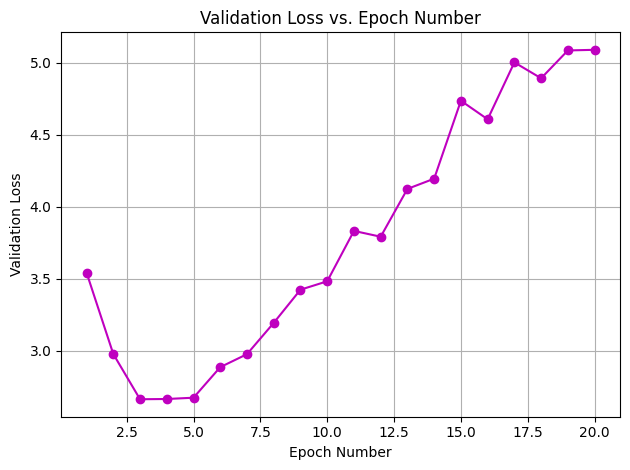

In [ ]:
plotloss(final_val_loss,"Validation")

In [ ]:
print("validation f1 score",final_val_f1_score)

validation f1 score [0.677238484270645, 0.753040050637444, 0.8200684401875528, 0.8136765557130247, 0.8219223802036577, 0.8097017469518343, 0.8013232556268036, 0.8068317110084848, 0.8043088968815346, 0.7912791446254935, 0.7926793634286272, 0.7978009506010638, 0.7953068815713635, 0.7986057712104806, 0.7847824278770444, 0.7957041244456508, 0.7946796922730988, 0.7880674737419625, 0.7926474717234754, 0.794193903614298]


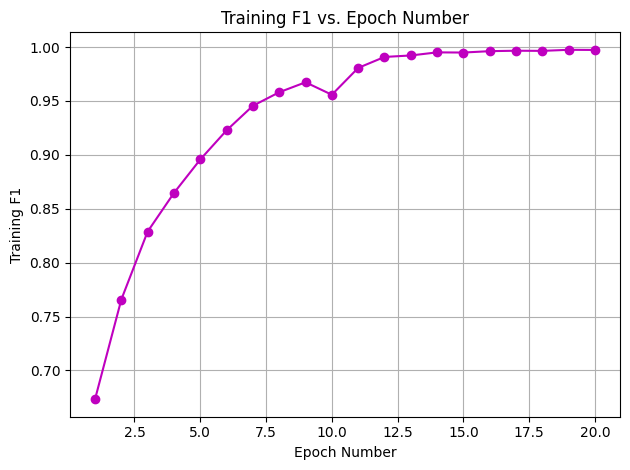

In [ ]:
plot_f1(final_train_f1_score,"Training")

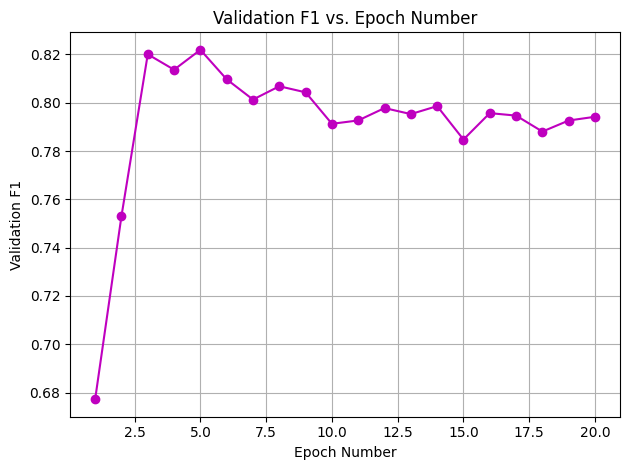

In [ ]:
plot_f1(final_val_f1_score,"Validation")

In [ ]:
final_accuracy, macro_f1_score = evaluate_model(model, testLoader)

print("The accuracy of the model is:", final_accuracy)
print("The Macro-F1 score obtained is:", macro_f1_score)

[0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 2, 2, 0, 1, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [19]:
word2vecpath='/content/drive/MyDrive/NLP_ass2/t2_GRU_fasttext.pth'
torch.save(model.state_dict(), word2vecpath)